# Model Training and Evaluation 
## Model Training, Hyperparameter with GridSearch CV

In [1]:
import os
print(os.path.exists(r'e:\Git_repo\Bati_bank_credit_risk\scripts\modeling.py'))

import sys
sys.path.append(r'e:\Git_repo\Bati_bank_credit_risk\scripts')

True


### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from modeling import (
    train_and_evaluate_models_with_tuning,
    perform_grid_search,
    save_model,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_feature_importance
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Load the dataset

In [3]:
data = pd.read_csv("E:/Git_repo/Bati_bank_credit_risk/data/preprocessed_data.csv")  

### Data Preparation

In [4]:
X = data.drop(columns=["FraudResult"])  
y = data["FraudResult"]

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Check the unique values in the target variable
print("Unique values in target:", y_train.unique())

# If the target is continuous and you want to bin it into categories (e.g., for binary classification)
y_train = pd.cut(y_train, bins=[-np.inf, 0.5, np.inf], labels=[0, 1])  # Example: Binary classification

# Alternatively, if you need to encode text labels into numeric ones, use LabelEncoder
# If your target is categorical but in text form (e.g., 'low', 'high')
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Now proceed with the training process


Unique values in target: [-0.04496219 22.24090895]


In [8]:
########## Convert target to categorical if needed
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [9]:
##################
print("y_train type:", type(y_train))
print("y_train unique values:", np.unique(y_train))


y_train type: <class 'numpy.ndarray'>
y_train unique values: [0 1]


In [ ]:
train_and_evaluate_models_with_tuning(X_train, X_test, y_train, y_test)

Training and tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


e:\Git_repo\Bati_bank_credit_risk\crvenv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training and tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


e:\Git_repo\Bati_bank_credit_risk\crvenv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.993103448275862


e:\Git_repo\Bati_bank_credit_risk\crvenv\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
e:\Git_repo\Bati_bank_credit_risk\crvenv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Random Forest Accuracy: 1.0000
Random Forest Precision: 1.0000
Random Forest Recall: 1.0000
Random Forest F1 Score: 1.0000
Random Forest ROC-AUC: nan


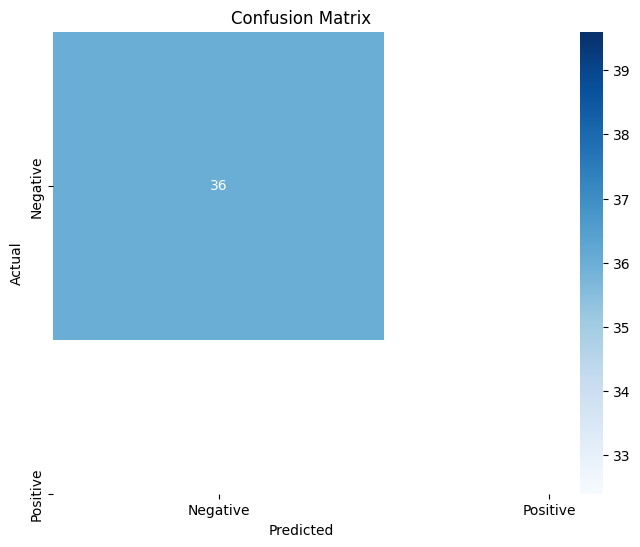

e:\Git_repo\Bati_bank_credit_risk\crvenv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


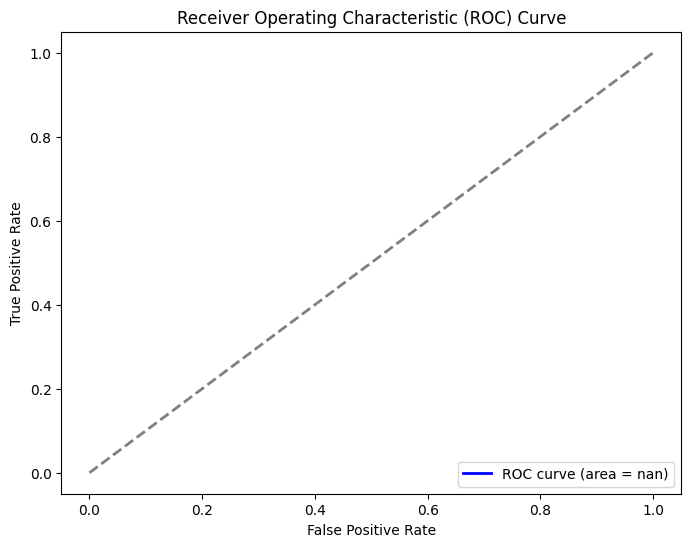

In [ ]:
train_and_evaluate_models_with_tuning(X_train, X_test, y_train, y_test)